In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

# Caseopgave til samtale nr. 2

Nedenfor indlæses de givne data v.h.a. pandas-biblioteket. For nemheds skyld har jeg ændret Excel-filen således at de forskellige kategorier står i Excel-kolonner i stedet for at være kommasepareret i en enkelt kolonne (gjort via tekst-til-kolonner). 

In [2]:
dat = pd.read_excel('DataScientist-Case-Dataset_columns.xlsx', index_col=None)
dat

,customer_id,converted,customer_segment,gender,age,related_customers,family_size,initial_fee_level,credit_account_id,branch
0,15001,0,13,male,22.0,1,0,14.5000,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,Helsinki
1,15002,1,11,female,38.0,1,0,142.5666,afa2dc179e46e8456ffff9016f91396e9c6adf1fe20d17...,Tampere
2,15003,1,13,female,26.0,0,0,15.8500,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,Helsinki
3,15004,1,11,female,35.0,1,0,106.2000,abefcf257b5d2ff2816a68ec7c84ec8c11e0e0dc4f3425...,Helsinki
4,15005,0,13,male,35.0,0,0,16.1000,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,Helsinki
...,...,...,...,...,...,...,...,...,...,...
886,15887,0,12,male,27.0,0,0,26.0000,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,Helsinki
887,15888,1,11,female,19.0,0,0,60.0000,72294ba1616ddcaee48e56501040e876d26bd0c1839f3c...,Helsinki
888,15889,0,13,female,NaN,1,2,46.9000,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,Helsinki
889,15890,1,11,male,26.0,0,0,60.0000,a2b612f45840d6f27b1a73ddae7f50e0bd9c4935903de6...,Tampere


In [3]:
dat.groupby(['converted']).mean()
#første inspektion: overblik over middelværdier af de numeriske parametre - her ses ved første øjekast at der især ved
#inital_fee_level er stor forskel på middelværdierne i de to kategorier (konverteret og ej konverteret)

,customer_id,customer_segment,age,related_customers,family_size,initial_fee_level
converted,,,,,,
0,15447.016393,12.531876,30.626179,0.553734,0.329690,44.235774
1,15444.368421,11.950292,28.343690,0.473684,0.464912,96.790815


13    491
11    216
12    184
Name: customer_segment, dtype: int64

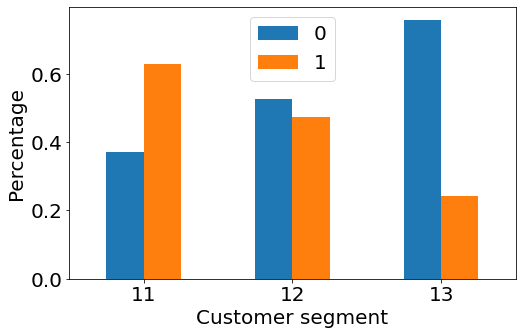

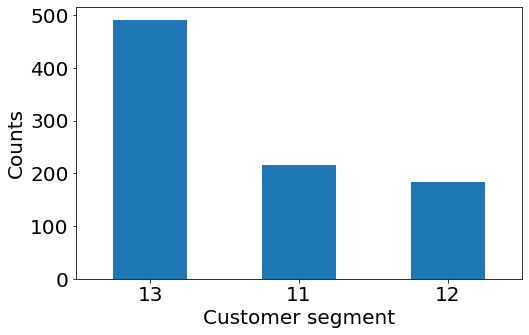

In [4]:
plt.rcParams.update({'font.size': 20})

ax = dat.groupby('customer_segment').converted.value_counts(normalize=True).unstack(1).plot.bar(figsize=(8,5))
plt.ylabel('Percentage')
plt.xlabel('Customer segment')
plt.xticks(rotation=0)
plt.legend(loc='upper center')
plt.savefig('Case_customer_segment_plot', bbox_inches='tight')

plt.figure()
ax = dat['customer_segment'].value_counts().plot.bar(figsize=(8,5))
plt.ylabel('Counts')
plt.xlabel('Customer segment')
plt.xticks(rotation=0)
# plt.legend(loc='upper center')
plt.savefig('Case_customer_segment_plot_abs', bbox_inches='tight')


dat['customer_segment'].value_counts()


male      577
female    314
Name: gender, dtype: int64


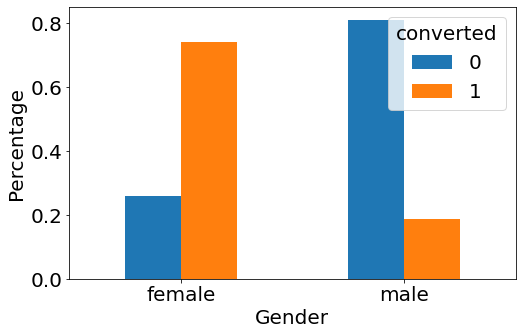

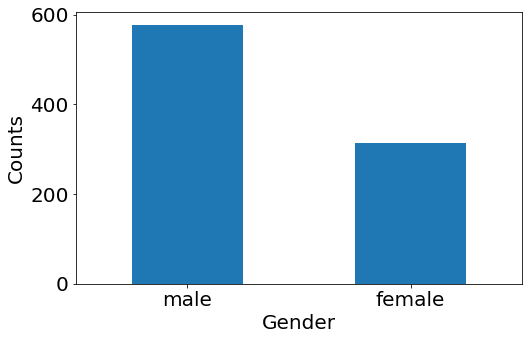

In [5]:
plt.rcParams.update({'font.size': 20})

dat.groupby('gender').converted.value_counts(normalize=True).unstack(1).plot.bar(figsize=(8,5))
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.savefig('Case_gender_plot', bbox_inches='tight')


plt.figure()
dat['gender'].value_counts().plot.bar(figsize=(8,5))
plt.xlabel('Gender')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.savefig('Case_gender_plot_abs', bbox_inches='tight')

print(dat['gender'].value_counts())

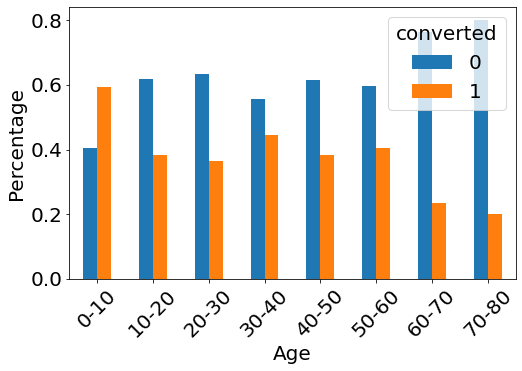

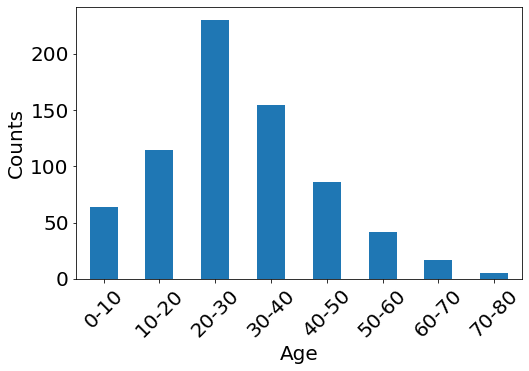

In [6]:
age_bins=[0, 10, 20, 30, 40, 50, 60, 70, 80]
age_groups = dat.groupby(['converted', pd.cut(dat['age'], bins=age_bins, labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80'], include_lowest=True)])

counts = age_groups.size()
norm = counts[0][:] + counts[1][:]

for i in range(len(norm)):
    if norm[i]==0:
        norm[i]=1
               
full_norm = np.concatenate((norm, norm), axis=None)

age_percentages = age_groups.size()/full_norm

age_percentages.unstack(0).plot.bar(figsize=(8,5))
plt.xticks(rotation=45);
plt.xlabel('Age')
plt.ylabel('Percentage')

plt.savefig('case_age_plot', bbox_inches='tight')


plt.figure()
abs_age_groups = dat.groupby(pd.cut(dat['age'], bins=age_bins, labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80'], include_lowest=True))
abs_age_groups.size().plot.bar(figsize=(8,5))
plt.xticks(rotation=45);
plt.xlabel('Age')
plt.ylabel('Counts')

plt.savefig('case_age_plot_abs', bbox_inches='tight')


# print(len([i for i in pd.isna(dat['age']) if i==False]))

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: related_customers, dtype: int64


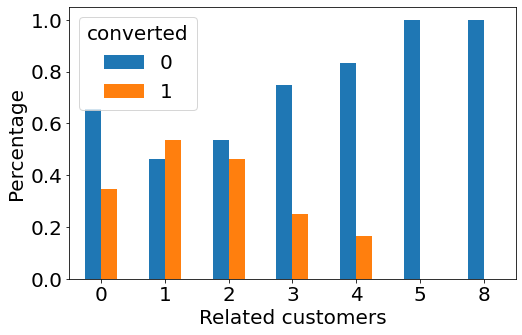

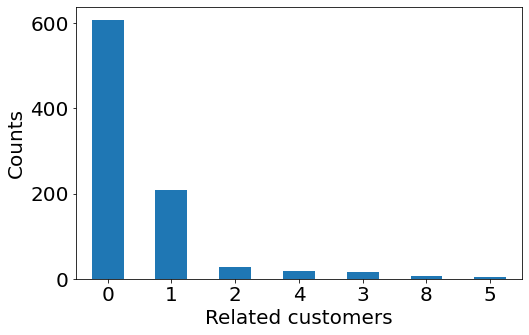

In [7]:
plt.rcParams.update({'font.size': 20})


dat.groupby('related_customers').converted.value_counts(normalize=True).unstack(1).plot.bar(figsize=(8,5))
plt.xticks(rotation=0)
plt.ylabel('Percentage')
plt.xlabel('Related customers')
plt.savefig('case_related_customers_plot', bbox_inches='tight')



plt.figure()
dat['related_customers'].value_counts().plot.bar(figsize=(8,5))
plt.xlabel('Related customers')
plt.ylabel('Counts')
plt.xticks(rotation=0)

plt.savefig('Case_related_customers_plot_abs', bbox_inches='tight')

print(dat['related_customers'].value_counts())

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: family_size, dtype: int64


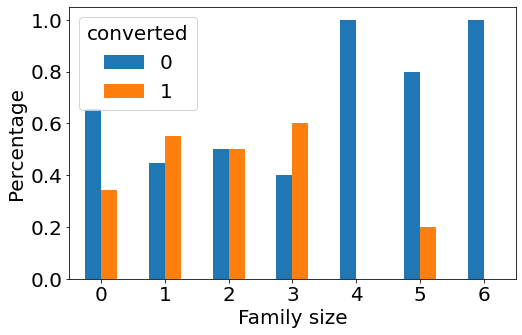

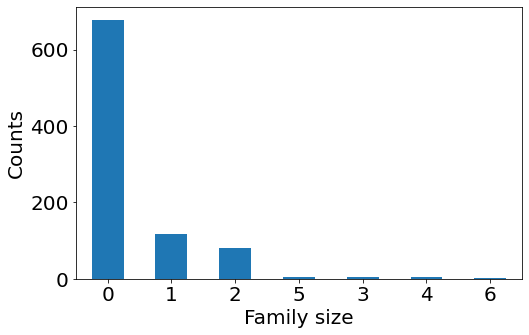

In [8]:
plt.rcParams.update({'font.size': 20})

dat.groupby('family_size').converted.value_counts(normalize=True).unstack(1).plot.bar(figsize=(8,5))
plt.xlabel('Family size')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.savefig('case_family_size_plot', bbox_inches='tight')


plt.figure()
dat['family_size'].value_counts().plot.bar(figsize=(8,5))
plt.xlabel('Family size')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.savefig('Case_family_size_plot_abs', bbox_inches='tight')


print(dat['family_size'].value_counts())

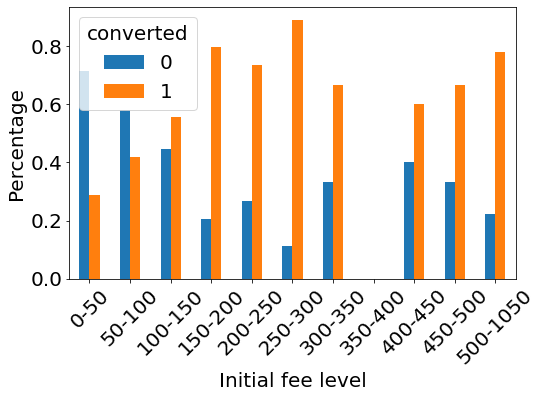

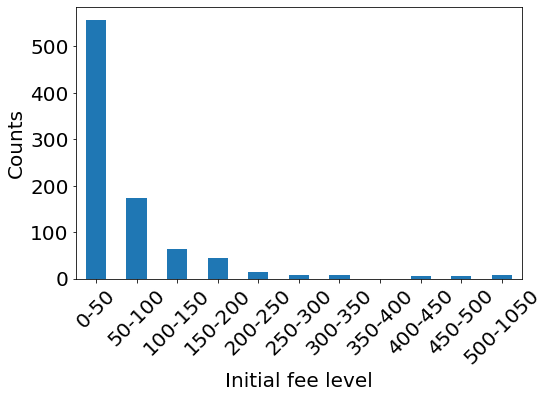

In [9]:
fee_bins = np.concatenate((np.linspace(0, 500, 11), 1050), axis=None)
fee_groups = dat.groupby(['converted', pd.cut(dat['initial_fee_level'], bins=fee_bins, labels=['0-50', '50-100', '100-150', '150-200', '200-250', '250-300', '300-350', '350-400', '400-450', '450-500', '500-1050'], include_lowest=True)])


fee_counts = fee_groups.size()
fee_norm = fee_counts[0][:] + fee_counts[1][:]

for i in range(len(fee_norm)):
    if fee_norm[i]==0:
        fee_norm[i]=1
               
full_fee_norm = np.concatenate((fee_norm, fee_norm), axis=None)
fee_percentages = fee_groups.size()/full_fee_norm



fee_percentages.unstack(0).plot.bar(figsize=(8,5))
plt.xticks(rotation=45);
plt.ylabel('Percentage')
plt.xlabel('Initial fee level')
# plt.savefig('case_initial_fee_level_plot', bbox_inches='tight')


plt.figure()
abs_fee_groups = dat.groupby(pd.cut(dat['initial_fee_level'], bins=fee_bins, labels=['0-50', '50-100', '100-150', '150-200', '200-250', '250-300', '300-350', '350-400', '400-450', '450-500', '500-1050'], include_lowest=True))
abs_fee_groups.size().plot.bar(figsize=(8,5))
plt.xticks(rotation=45);
plt.xlabel('Initial fee level')
plt.ylabel('Counts')

plt.savefig('case_initial_fee_level_plot_abs', bbox_inches='tight')

9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0    687
f0d3a2a5176986eddfdd60b0b303d8fd7c4dfe3060479feee41224ef86f7174a      4
780d558be6960a54064f888577409d1c92eb7c3d6c65e6bf4f286a3e26dde543      4
cec0a7de7f8d6fc385250a76e38555a1f45fd5aaeb1a2ba3dbdf90a049bb0681      4
8383f5026533caa5efd695ad9e174cc65d739cbb680f0e237ad3627343bdb74f      3
                                                                   ... 
85819be79f31aeb746251daac765c03d826025b366df8e777edf28812d948f72      1
f167717fb2ed36e774225dd5b609cd208e028ba12cfc08946de444227e4e80d2      1
6a44b555fef365ccdd36d27fa519f6bc7c2a556bfa63c04b500906eb6b4f4bab      1
e70ba215a23e2c438f86bc8ddf119c579b7bff180841c6bea16c8b32ddfc7dea      1
a2b612f45840d6f27b1a73ddae7f50e0bd9c4935903de602fdbc2da6d62e06a8      1
Name: credit_account_id, Length: 148, dtype: int64


converted
0    481
1    206
Name: converted, dtype: int64

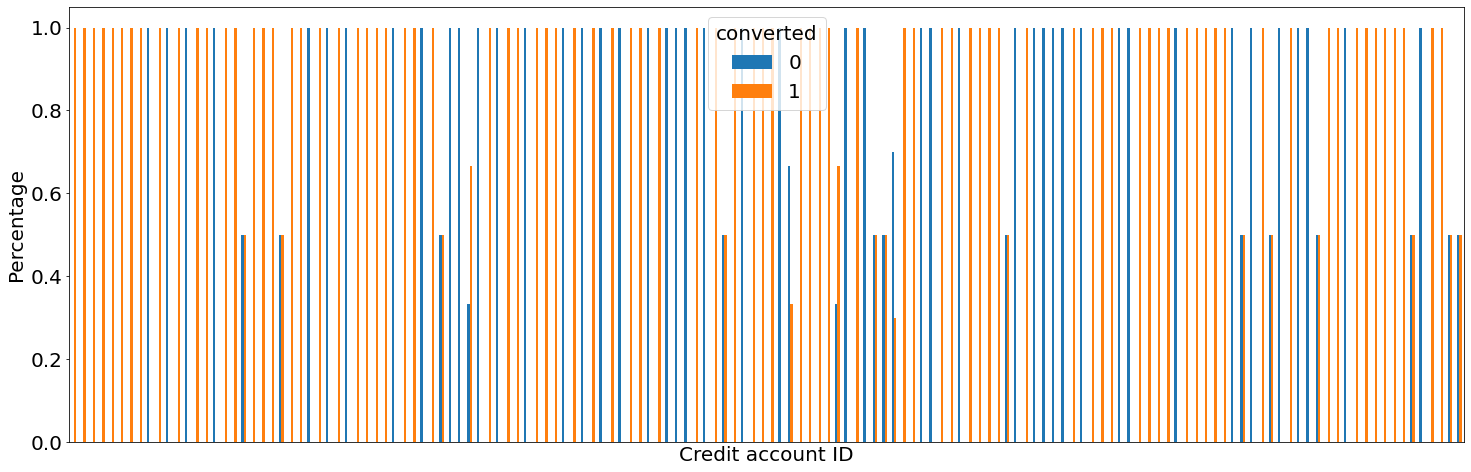

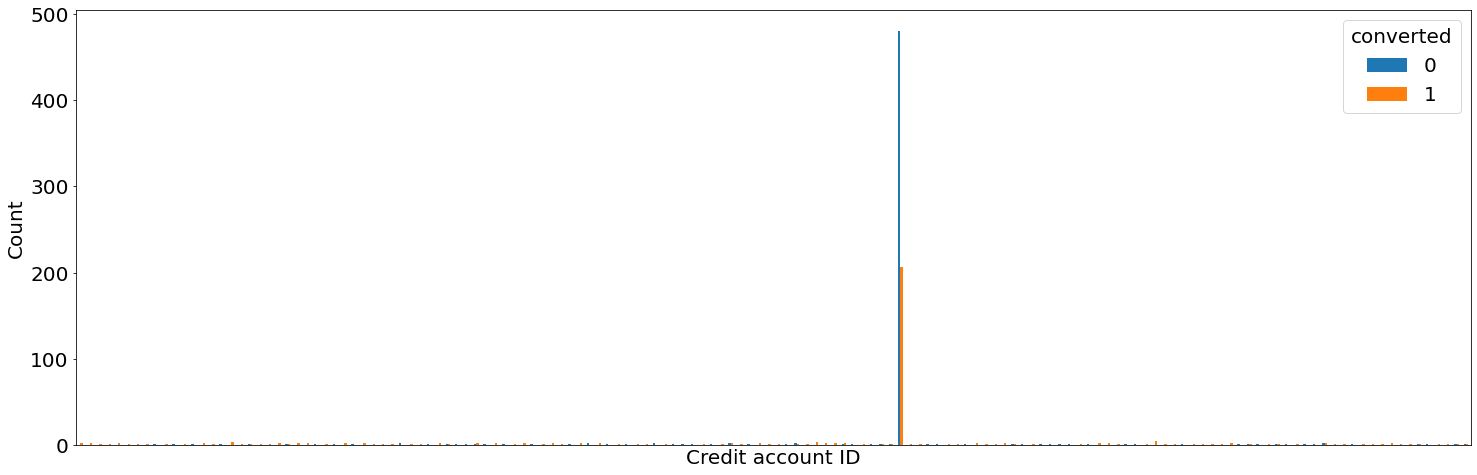

In [10]:
plt.rcParams.update({'font.size': 20})

dat.groupby('credit_account_id').converted.value_counts(normalize=True).unstack(1).plot.bar(figsize=(25, 8))
plt.xlabel('Credit account ID')
plt.ylabel('Percentage')
plt.xticks(ticks=[], labels=[])
plt.savefig('case_credit_account_id_plot')


dat.groupby('credit_account_id').converted.value_counts().unstack(1).plot.bar(figsize=(25, 8))
plt.xlabel('Credit account ID')
plt.ylabel('Count')
plt.xticks(ticks=[], labels=[])
plt.savefig('case_credit_account_id_plot_abs')


print((dat['credit_account_id'].value_counts()))
dat.groupby('credit_account_id').converted.value_counts()['9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0']

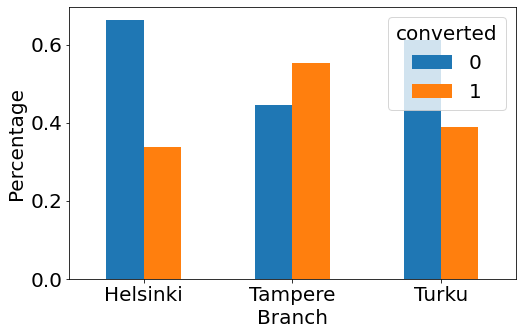

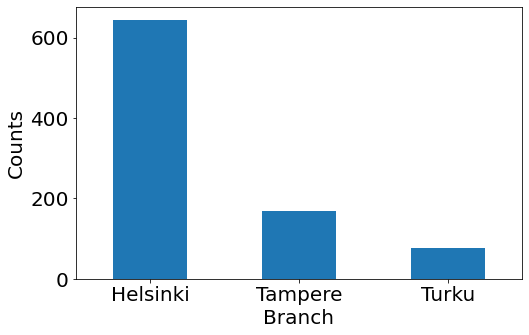

In [11]:
plt.rcParams.update({'font.size': 20})

dat.groupby('branch').converted.value_counts(normalize=True, sort=False).unstack(1).plot.bar(figsize=(8,5))
plt.xlabel('Branch')
plt.ylabel('Percentage')
plt.xticks(rotation=0)

plt.savefig('case_branch_plot', bbox_inches='tight')

plt.figure()
dat['branch'].value_counts().plot.bar(figsize=(8,5))
plt.xlabel('Branch')
plt.ylabel('Counts')
plt.xticks(rotation=0)

plt.savefig('case_branch_plot_abs', bbox_inches='tight')

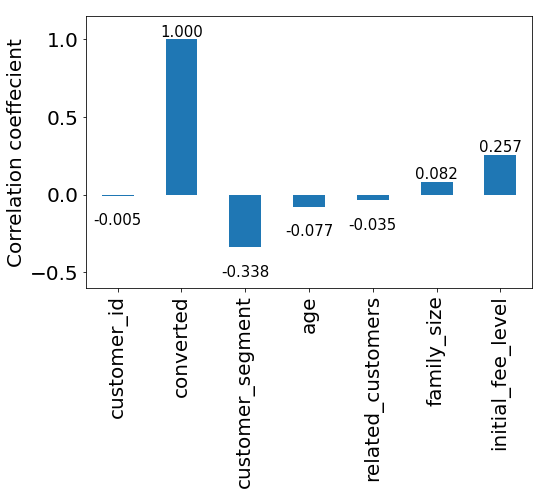

In [12]:
plt.rcParams.update({'font.size': 20})

ax = dat.corr()['converted'].plot.bar(figsize=(8,5))
for container in ax.containers:
    ax.bar_label(container, fmt='\n%.3f', fontsize=15)
ax.set_ylim(-0.6, 1.15)
ax.set_ylabel('Correlation coeffecient')
plt.savefig('Case_correlation_plot', bbox_inches='tight')

In [13]:
pd.get_dummies(dat['gender'])['female']
print('Korrelation mellem gender og converted:', pd.get_dummies(dat['gender'])['female'].corr(dat['converted']))

Korrelation mellem gender og converted: 0.5433513806577546


In [15]:
chi2_test_branch = stats.chi2_contingency(pd.crosstab(dat['converted'], dat['branch']))
print(f'chi2_branch: {chi2_test_branch[0]}, pval: {chi2_test_branch[1]}')

chi2_branch: 26.48914983923762, pval: 1.769922284120912e-06


In [16]:
chi2_test_id = stats.chi2_contingency(pd.crosstab(dat['converted'], dat['credit_account_id']))
print(f'chi2_credit_account_ID: {chi2_test_id[0]}, pval: {chi2_test_id[1]}')

chi2_credit_account_ID: 240.99672677470033, pval: 1.617698166309318e-06


In [25]:
import researchpy as rp
crosstab, test_results, expected = rp.crosstab(dat['converted'], dat['branch'],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

print(test_results)

                Chi-square test  results
0  Pearson Chi-square ( 2.0) =   26.4891
1                    p-value =    0.0000
2                 Cramer's V =    0.1726


In [23]:
import researchpy as rp
crosstab, test_results, expected = rp.crosstab(dat['converted'], dat['credit_account_id'],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

print(test_results)

                  Chi-square test   results
0  Pearson Chi-square ( 147.0) =   240.9967
1                      p-value =     0.0000
2                   Cramer's V =     0.5201


# XGBoost

C:\Users\Anna\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Accuracy: 83.85%


Text(0, 0.5, 'Feature importance')

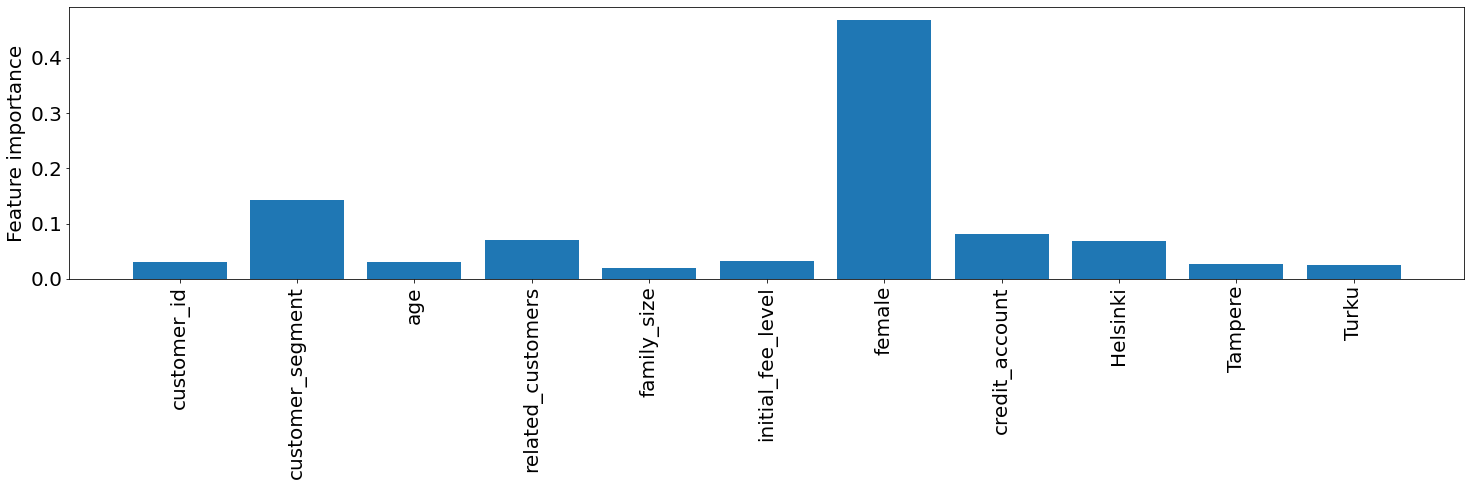

In [17]:
plt.rcParams.update({'font.size': 20})

import xgboost as xgb
from sklearn.metrics import accuracy_score

dat['female'] = pd.get_dummies(dat['gender'])['female']
dat['credit_account'] = pd.get_dummies(dat['credit_account_id'])['9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0']
dat['Helsinki'] = pd.get_dummies(dat['branch'])['Helsinki']
dat['Tampere'] = pd.get_dummies(dat['branch'])['Tampere']
dat['Turku'] = pd.get_dummies(dat['branch'])['Turku']

Y_train = dat['converted'][:600]
X_train = dat.drop(['converted', 'gender', 'credit_account_id', 'branch'], axis=1)[:600]

X_test = dat.drop(['converted', 'gender', 'credit_account_id', 'branch'], axis=1)[600:]
Y_test=dat['converted'][600:]

model = xgb.XGBClassifier(booster='gbtree', n_estimators=50)
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))  #total accuracy 


plt.figure(figsize=(25,5))
plt.bar(dat.drop(['converted', 'gender', 'credit_account_id', 'branch'], axis=1).columns, model.feature_importances_)
plt.xticks(rotation=90)
plt.ylabel('Feature importance')
# plt.show()

# plt.savefig('Case_XGboost', bbox_inches='tight')